In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\Testing\glioma_tumor\image(1).jpg
dataset\Testing\glioma_tumor\image(10).jpg
dataset\Testing\glioma_tumor\image(100).jpg
dataset\Testing\glioma_tumor\image(11).jpg
dataset\Testing\glioma_tumor\image(12).jpg
dataset\Testing\glioma_tumor\image(13).jpg
dataset\Testing\glioma_tumor\image(14).jpg
dataset\Testing\glioma_tumor\image(15).jpg
dataset\Testing\glioma_tumor\image(16).jpg
dataset\Testing\glioma_tumor\image(17).jpg
dataset\Testing\glioma_tumor\image(18).jpg
dataset\Testing\glioma_tumor\image(19).jpg
dataset\Testing\glioma_tumor\image(2).jpg
dataset\Testing\glioma_tumor\image(20).jpg
dataset\Testing\glioma_tumor\image(21).jpg
dataset\Testing\glioma_tumor\image(22).jpg
dataset\Testing\glioma_tumor\image(23).jpg
dataset\Testing\glioma_tumor\image(24).jpg
dataset\Testing\glioma_tumor\image(25).jpg
dataset\Testing\glioma_tumor\image(26).jpg
dataset\Testing\glioma_tumor\image(27).jpg
dataset\Testing\glioma_tumor\image(28).jpg
dataset\Testing\glioma_tumor\image(29).jpg
dataset\Test

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [16]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [17]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [18]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape


(3264, 150, 150, 3)

Data Visualization

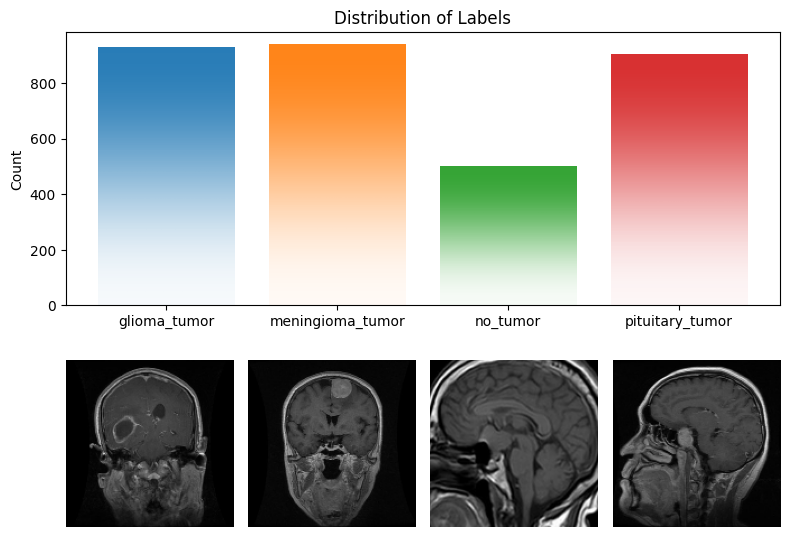

In [19]:
label_counts = {label: np.sum(Y_train == label) for label in labels}

# Plot the bar plot and sample images in one chart
plt.figure(figsize=(8, 6))

colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
# plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Plot sample images from each label
k = 0
for i in labels:
    j = 0
    while True:
        if Y_train[j] == i:
            plt.subplot(2, 4, k + 5) 
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1
        
plt.tight_layout()
plt.show()

Train Test Split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [21]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


83/83 [==============================] - 112s 1s/step - loss: 1.8979 - accuracy: 0.2891 - val_loss: 1.3603 - val_accuracy: 0.3095
Epoch 2/20
83/83 [==============================] - 112s 1s/step - loss: 1.3544 - accuracy: 0.3167 - val_loss: 1.3705 - val_accuracy: 0.2891
Epoch 3/20
83/83 [==============================] - 111s 1s/step - loss: 1.3441 - accuracy: 0.3197 - val_loss: 1.3655 - val_accuracy: 0.2891
Epoch 4/20
83/83 [==============================] - 110s 1s/step - loss: 1.1688 - accuracy: 0.4813 - val_loss: 1.0874 - val_accuracy: 0.5204
Epoch 5/20
83/83 [==============================] - 115s 1s/step - loss: 0.9363 - accuracy: 0.5952 - val_loss: 0.8433 - val_accuracy: 0.6361
Epoch 6/20
83/83 [==============================] - 122s 1s/step - loss: 0.7875 - accuracy: 0.6614 - val_loss: 0.9494 - val_accuracy: 0.6122
Epoch 7/20
83/83 [==============================] - 118s 1s/step - loss: 0.6997 - accuracy: 0.7238 - val_loss: 0.6795 - val_accuracy: 0.6905
Epoch 8/20


In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

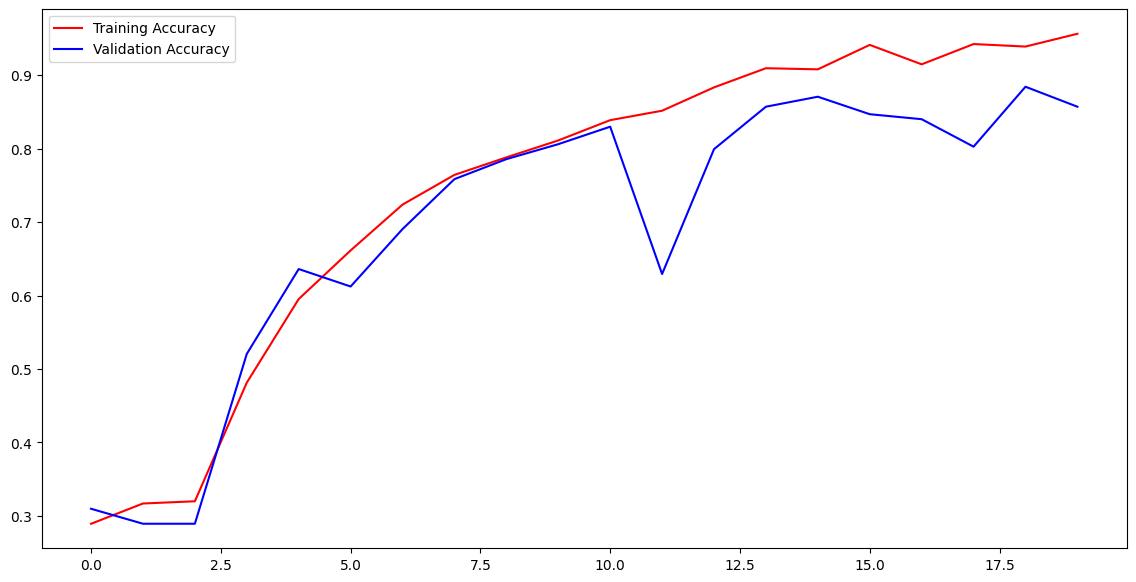

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

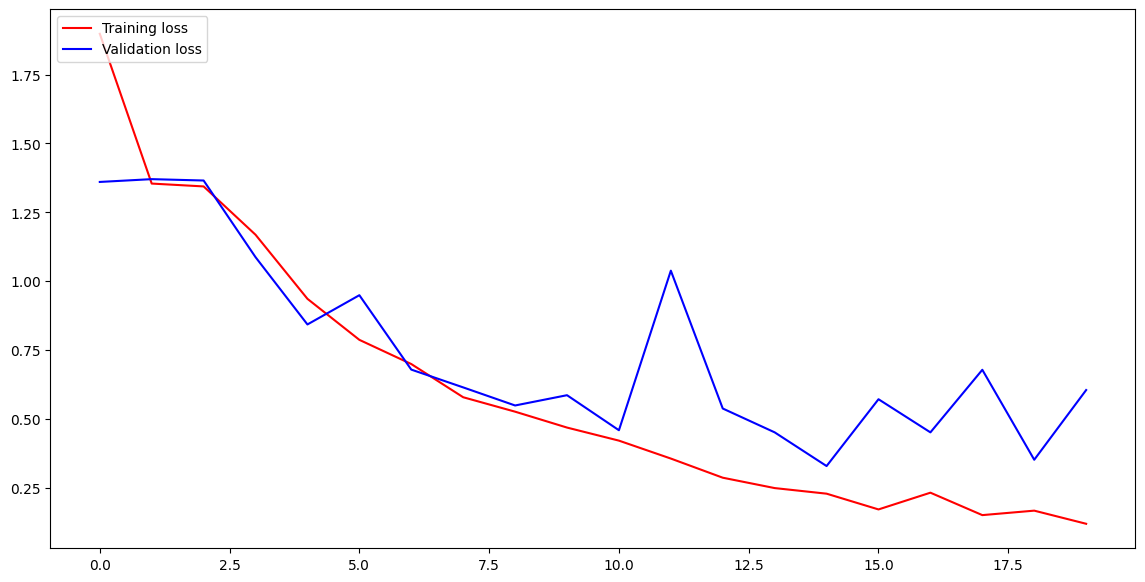

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [29]:
# Save the trained model
model.save(r'C:\MY LEARNING\Major Project\cnnModel.keras')

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

11/11 [==============================] - 3s 260ms/step - loss: 0.6233 - accuracy: 0.8257
Test Loss: 0.6233159899711609
Test Accuracy: 0.8256880640983582


In [31]:
# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model(r'C:\MY LEARNING\Major Project\cnnModel.keras')

11/11 [==============================] - 3s 262ms/step


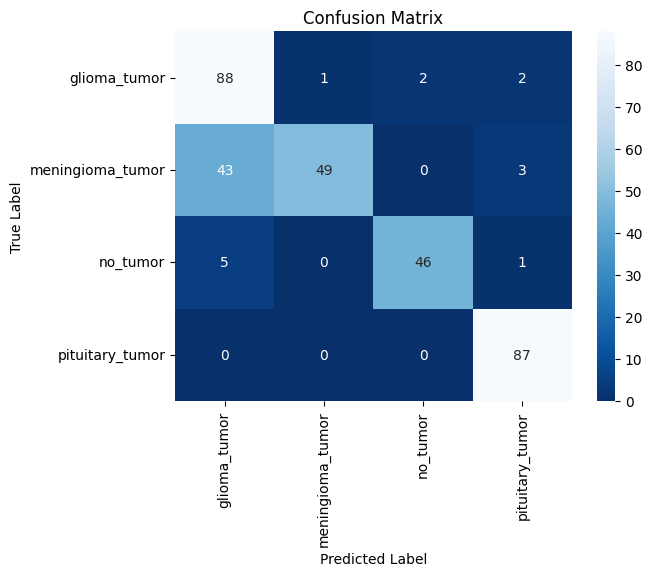

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77        93
           1       0.98      0.52      0.68        95
           2       0.96      0.88      0.92        52
           3       0.94      1.00      0.97        87

    accuracy                           0.83       327
   macro avg       0.88      0.84      0.83       327
weighted avg       0.87      0.83      0.82       327



In [34]:
img = cv2.imread('dataset/Training/pituitary_tumor/p (107).jpg')
print(type(img))
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [35]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

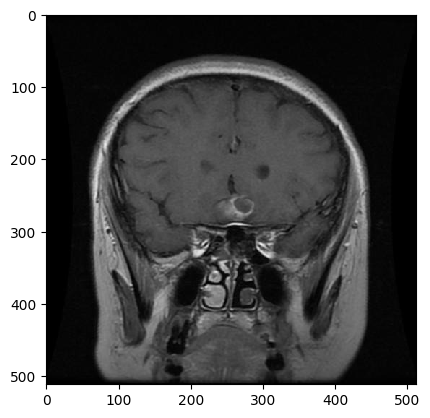

In [36]:
from tensorflow.keras.preprocessing import image
img = image.load_img('dataset/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [37]:
a=model.predict(img_array)
indices = a.argmax()
indices


1/1 [==============================] - 0s 50ms/step


3

1/1 [==============================] - 0s 36ms/step
Predicted label: pituitary_tumor 
Actual label: pituitary_tumor 
Confidence: 99.97%



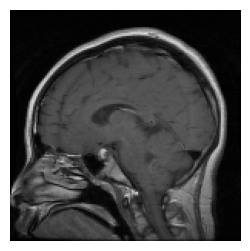

In [63]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class]  

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()